# 初学Scipy

SciPy提供了基于Numpy数组的算法级应用。
矩阵运算、线性代数、最优化方法、聚类、空间运算、快速傅立叶变换等

Numpy的全部命名空间都可以通过Scipy访问。

In [2]:
import scipy, numpy

In [3]:
scipy.version.full_version

'0.19.0'

In [4]:
scipy.dot is numpy.dot

True

**SciPy工具包**----------**功能**
******************************
* cluster-------------层次聚类（cluster.hierarchy)
* --------------------矢量量化/K均值（cluster.vq)
* constants-----------物力和数学常量
* --------------------转换方法
* fftpack-------------离散傅立叶变换算法
* integrate-----------积分例程
* interpolate---------插值（线性的，三次方的，等等）
* io------------------数据输入和输出
* linalg--------------采用优化blas和lapack库的线性袋鼠函数
* maxentropy----------最大熵模型的函数
* ndimage-------------n维图像工具包
* odr-----------------正交距离回归
* optimize------------最优化（寻找极小值和方程的根）
* signal--------------信号处理
* sparse--------------稀疏矩阵
* spatial-------------空间数据结构和算法
* special-------------特殊数学函数如塞贝尔函数或雅可比函数
* stats---------------统计学工具包

In [5]:
import scipy as sp

In [7]:
data = sp.genfromtxt("./data/web_traffic.tsv", delimiter="\t")

In [8]:
print(data[:10])

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00              nan]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]


In [9]:
print(data.shape)

(743, 2)


### 切分
SciPy 特殊索引标记 **:,n**
更多信息[Tentative_Numpy_Tutorial](http://www.scipy.org/Tentative_NumPy_Tutorial)

In [13]:
x = data[:,0]
y = data[:,1]

In [14]:
sp.sum(sp.isnan(y))

8

In [16]:
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

### Matplotlib散点图

In [17]:
import matplotlib.pyplot as plt

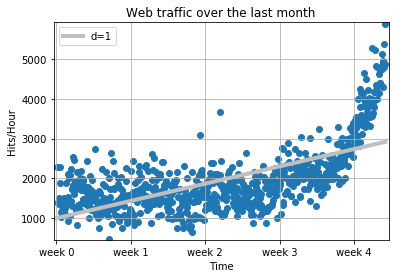

In [36]:
plt.scatter(x,y)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/Hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' %w for w in range(10)])
plt.autoscale(tight=True)
plt.grid()
plt.show()

## 选择正确的模型和学习算法

### 计算误差
模型预测值到真实值的平方距离来计算这个误差。

In [20]:
def error(f, x, y):
    return sp.sum((f(x) - y) ** 2)

### 从一条直线开始
在图中画出最佳直线，使结果中的近似误差最小。
**polyfit()**
> x  
> y  
> 期望的多项式的阶（直线是1）

In [21]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y ,1, full=True)

In [27]:
print("Model parameters: %s" %fp1)
print(residuals)
#f(x)=2.59*x + 989

Model parameters: [   2.59619213  989.02487106]
[  3.17389767e+08]


In [29]:
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

317389767.34


In [35]:
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=4, color='0.75')
plt.legend(["d=%i" % f1.order], loc="upper left")